In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
!pip install plotly

In [3]:
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import random as rand
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from scipy.special import betainc
from scipy.special import gamma
import matplotlib.pyplot as plt
from statistics import NormalDist
import numpy as np
import colorsys
import random
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [4]:
#volume sphere rayon 1
def nSphereVolume(dim, iterations):
    count_in_sphere = 0

    for count_loops in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim)
        distance = np.linalg.norm(point)
        if distance < 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / iterations)

print(nSphereVolume(3, 100000))

4.18664


In [ ]:
for i in range(1, 10):
    print(nSphereVolume(i, 1000000))

In [5]:
def n_dim_cone_volume(iterations, c, theta, dim):
    count_in_cone = 0
    point_cone = []
    
    for count_loops in range(iterations):
        
        point = np.random.uniform(c-1, c+1, dim)
        z = point[0]
        point[0] = 0
        S = 0
        for p in point:
            S = S + p**2
        rho = np.sqrt(S)
        point[0] = z

        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            point_cone.append(point)
        
    return np.power(2.0, dim) * (count_in_cone / iterations), point_cone

In [5]:
result_2 = n_dim_cone_volume(100000, 0, np.pi/4, 2)
result_3 = n_dim_cone_volume(100000, 0, np.pi/4, 3)

print(result_2[0], result_3[0])


1.00848 1.04568


<IPython.core.display.Javascript object>


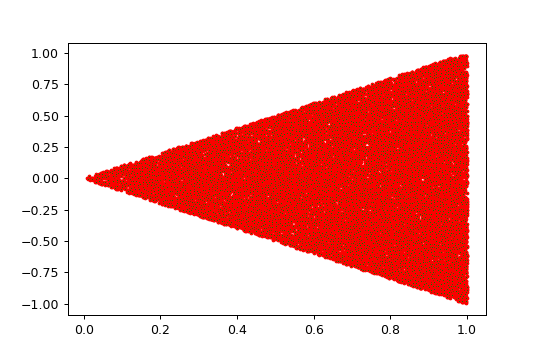

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [8]:
for point in result_2[1]:
    plt.plot(point[0], point[1], marker="o", markersize=2, markeredgecolor="red", markerfacecolor="green")
    plt.show()


<IPython.core.display.Javascript object>


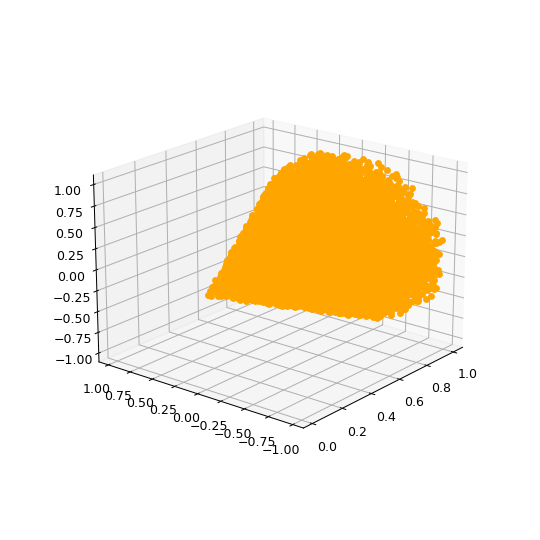

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for point in result_3[1]:
    ax.scatter(point[0], point[1], point[2], color = 'orange')

$${\displaystyle V_{n}(R)={\frac {2(2\pi )^{(n-1)/2}}{n!!}}R^{n}.}$$

In [29]:
def single_noise_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim):
    count_in_sphere = 0
    count_in_cone = 0
    points_sphere = []
    points_cone = []

    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
    
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            points_cone.append(point)
    if count_in_sphere != 0:
        
        vol_in_cone = vol_boule * (count_in_cone/count_in_sphere)
    
        #fig = plt.figure(figsize=(6, 6))
        #ax = fig.add_subplot(111, projection='3d')
        #for i in points_cone:
            #ax.scatter(i[0], i[1], i[2], color = 'orange')
        vol_out_cone = vol_boule - vol_in_cone
    
        #probabilité que les points de la boule ne soient pas dans le cone:
        p1 = 1 - count_in_cone/count_in_sphere
    
        #on déplace de epsilon vers la droite de l'axe du cone
        a = (dim + 1)/2 
        b = 1/2
        x = 1 - (epsilon/(2*rayon))**2
        Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
        Psn = p1 - 1 + 2*(Vcap/vol_boule)
        PSn2 = p1 - 1 + betainc(a, b, x)

        return Psn, p1
    else:
        print("erreur division par 0 a dim : " + str(dim))
        return(0)

In [32]:
single_noise_déplacement_epsilon_uniforme_n_dim(10, 0.5, 0, np.pi/4, 100000, 3)

(0.8170961103925569, 0.8545882978925565)

In [5]:
results_dim = []
for i in range(1, 10):
    results_dim.append(single_noise_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 1000000, i))

<IPython.core.display.Javascript object>


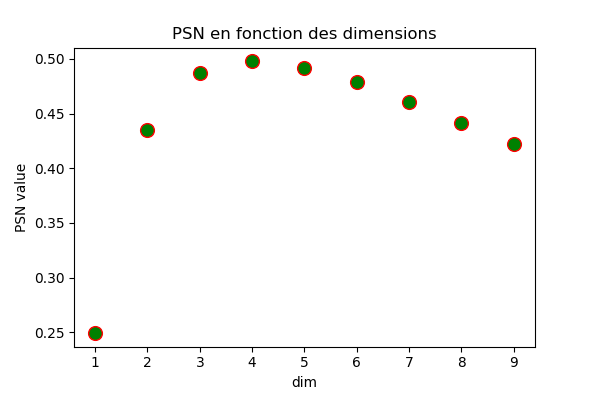

Text(0.5, 1.0, 'PSN en fonction des dimensions')

In [6]:
fig1, ax1 = plt.subplots()
for i in range(1, 10):
    ax1.plot(i, results_dim[i-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax1.set_xlabel("dim")
ax1.set_ylabel("PSN value")
ax1.set_title("PSN en fonction des dimensions")

In [8]:
print(results_dim[2])

0.48566852631010626


In [26]:
def P_true_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim):
    #On parle de vol_deplace/vol_boule où vol_déplacé sont les points tels que après une translation epsilon soient dans la boule
    #mais pas dans le cone.
    count_in_sphere = 0
    count_in_transl = 0
    points_sphere = []
    points_transl = []
    points_not_in_cone = []
    points_in_cone = []
    count_not_in_cone = 0
    
    #Set de points dans la boule:
    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'orange')
        
    #on fait la translation sur x
    for i in points_sphere:
        i[0] = i[0] + epsilon
    
    #on teste si on est en dehors ou non du cone:
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S)
        if (z > c) and (rho <= z*np.tan(theta)):
            points_in_cone.append(point)
        else:
            count_not_in_cone += 1
            points_not_in_cone.append(point)
    #on calcule alors le volume:
    if count_in_sphere != 0:
        vol_deplace = vol_boule*(count_not_in_cone/count_in_sphere)
        
        p_true = vol_deplace/vol_boule
        
        #for i in points_not_in_cone:
            #ax.scatter(i[0], i[1], i[2], color = 'green')
        
        return p_true
    else:
        print("error division by 0 at dim:" + str(dim))
        return 0

In [17]:
results_dim_p = []
for i in range(1, 10):
    results_dim_p.append(P_true_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 1000000, i))


<IPython.core.display.Javascript object>


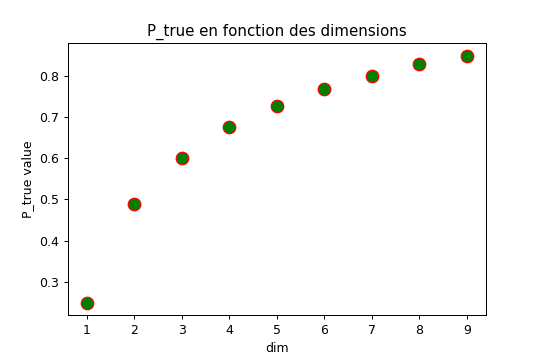

Text(0.5, 1.0, 'P_true en fonction des dimensions')

In [19]:
fig2, ax2 = plt.subplots()
for i in range(1, 10):
    ax2.plot(i, results_dim_p[i-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax2.set_xlabel("dim")
ax2.set_ylabel("P_true value")
ax2.set_title("P_true en fonction des dimensions")

In [63]:
def diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, theta, iterations, dim):
    p_true = P_true_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim)
    PSN = single_noise_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim)
    return(p_true - PSN)

In [9]:
def graphe_n_dim_thetas_var(n_theta, rayon, epsilon, c, iterations, dim):
    thetas = np.linspace(0, np.pi/2, n_theta, endpoint = False)
    liste = []
    for th in thetas:
        liste.append(diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, th, iterations, dim))
    fig, ax = plt.subplots()
    ax.plot(thetas, liste)
    ax.set_xlabel("Thetas")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise, rayon = ' + str(rayon) + ', a dimension ' + str(dim))


<IPython.core.display.Javascript object>


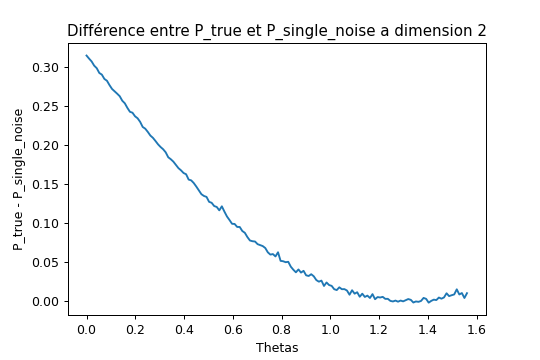

<IPython.core.display.Javascript object>


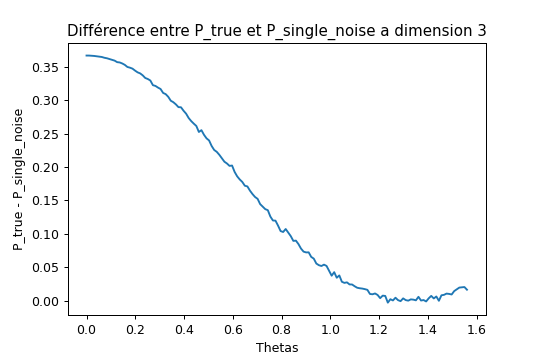

<IPython.core.display.Javascript object>


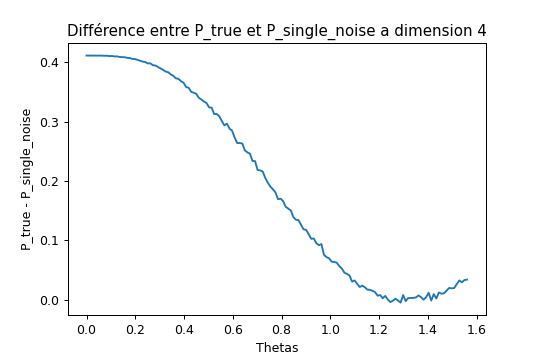

In [22]:
for i in range(2, 5):
    graphe_n_dim_thetas_var(150, 1, 0.5, 0, 100000, i)

In [10]:
def graphe_n_dim_dims_var(rayon, epsilon, c, thetas, iterations, dim_list):
    fig, ax = plt.subplots()
    liste_res = []
    for th in thetas:
        liste = []
        for i in dim_list:
            liste.append(diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, th, iterations, i))
        liste_res.append(liste[:])
        
    for i in range(len(thetas)):
        
        ax.plot(dim_list, liste_res[i], label = 'theta: ' + str(thetas[i]))
        ax.legend()
    ax.set_xlabel("Dimensions")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise a thetas fixés. Rayon = ' + str(rayon))

<IPython.core.display.Javascript object>


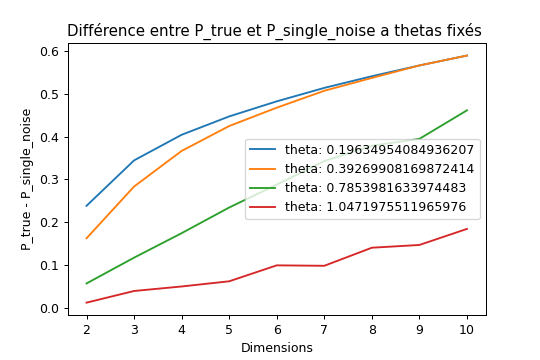

In [35]:
dim_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
thetas = [np.pi/16, np.pi/8, np.pi/4, np.pi/3]
graphe_n_dim_dims_var(1, 0.5, 0, thetas, 100000, dim_list)

In [11]:
def graphe_n_dim_rayon_var(r_init, r_fin, nbre_rayons, epsilon, c, thetas, iterations, dim):
    fig, ax = plt.subplots()
    liste_res = []
    for th in thetas:
        liste = []
        r = np.linspace(r_init, r_fin, nbre_rayons)
        for r_ in r:
            liste.append(diff_p_true_p_single_noise_n_dim(r_, epsilon, c, th, iterations, dim))
        liste_res.append(liste[:])
    
    for i in range(len(thetas)):
        ax.plot(r, liste_res[i], label = 'theta: ' + str(thetas[i]))
        ax.legend()
    ax.set_xlabel("Rayon")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise a thetas fixés, en fonction du rayon. Dimension = ' + str(dim))

<IPython.core.display.Javascript object>


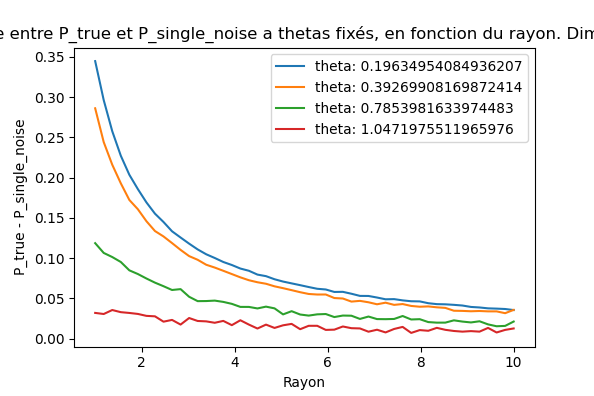

In [14]:
r_init, r_fin, nbre_rayons = 1, 10, 50
thetas = [np.pi/16, np.pi/8, np.pi/4, np.pi/3]
graphe_n_dim_rayon_var(r_init, r_fin, nbre_rayons, 0.5, 0, thetas, 100000, 3)

In [12]:
#Graphe dimensions différentes en fonction de théta
def graph_n_dim_theta_var_mult_dim(n_theta, rayon, epsilon, c, iterations, dim_list):
    thetas = np.linspace(0, np.pi/2, n_theta, endpoint = False)
    fig, ax = plt.subplots()
    for dim in dim_list:
        liste = []
        for th in thetas:
            liste.append(diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, th, iterations, dim))
        ax.plot(thetas, liste[:], label = 'dim: ' + str(dim))
        ax.legend()
    ax.set_xlabel("Thetas")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise, rayon = ' + str(rayon) + ', a dimension variable')

<IPython.core.display.Javascript object>


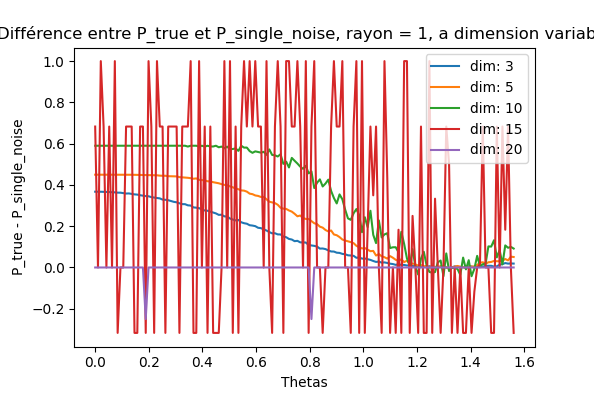

error division by 0 at dim:15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
erre

In [17]:
dimensions = [3, 5, 10, 15, 20]
graph_n_dim_theta_var_mult_dim(150, 1, 0.5, 0, 100000, dimensions)

<IPython.core.display.Javascript object>


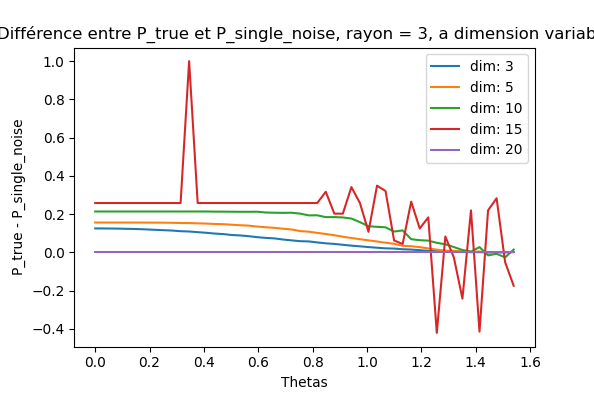

erreur division par 0 a dim : 15
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at dim:20
erreur division par 0 a dim : 20
error division by 0 at

In [18]:
graph_n_dim_theta_var_mult_dim(50, 3, 0.5, 0, 1000000, dimensions)

<IPython.core.display.Javascript object>


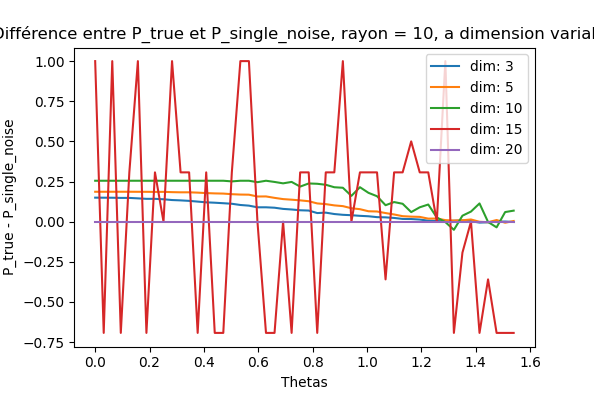

erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at dim:15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
erreur division par 0 a dim : 15
error division by 0 at dim:15
error division by 0 at dim:15
erreur division par 0 a dim : 15
error division by 0 at di

In [19]:
graph_n_dim_theta_var_mult_dim(50, 10, 2, 0, 100000, dimensions)

# Maintenant avec bruit Gaussien (FAUX)

In [8]:
from statistics import NormalDist

In [10]:
def single_noise_déplacement_epsilon_gauss_n_dim(rayon, epsilon, c, theta, iterations, dim, mu, sigma):
    count_in_sphere = 0
    count_in_cone = 0
    points_sphere = []
    points_cone = []

    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
    
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            points_cone.append(point)
    if count_in_sphere != 0:
        
        vol_in_cone = vol_boule * (count_in_cone/count_in_sphere)
    
        #fig = plt.figure(figsize=(6, 6))
        #ax = fig.add_subplot(111, projection='3d')
        #for i in points_cone:
            #ax.scatter(i[0], i[1], i[2], color = 'orange')
        vol_out_cone = vol_boule - vol_in_cone
    
        #probabilité que les points de la boule ne soient pas dans le cone:
        p1 = 1 - count_in_cone/count_in_sphere
        
        PSN = NormalDist(mu = mu, sigma = sigma).cdf(NormalDist(mu=mu, sigma=sigma).inv_cdf(p1) - epsilon/sigma)
        

        return PSN
    else:
        print("erreur division par 0 a dim : " + str(dim))
        return(0)
    
def single_noise_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim):
    count_in_sphere = 0
    count_in_cone = 0
    points_sphere = []
    points_cone = []

    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
    
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            points_cone.append(point)
    if count_in_sphere != 0:
        
        vol_in_cone = vol_boule * (count_in_cone/count_in_sphere)
    
        #fig = plt.figure(figsize=(6, 6))
        #ax = fig.add_subplot(111, projection='3d')
        #for i in points_cone:
            #ax.scatter(i[0], i[1], i[2], color = 'orange')
        vol_out_cone = vol_boule - vol_in_cone
    
        #probabilité que les points de la boule ne soient pas dans le cone:
        p1 = 1 - count_in_cone/count_in_sphere
    
        #on déplace de epsilon vers la droite de l'axe du cone
        a = (dim + 1)/2 
        b = 1/2
        x = 1 - (epsilon/(2*rayon))**2
        Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
        Psn = p1 - 1 + 2*(Vcap/vol_boule)
        PSn2 = p1 - 1 + betainc(a, b, x)

        return Psn
    else:
        print("erreur division par 0 a dim : " + str(dim))
        return(0)

In [11]:
results_dim_unif = []
for i in range(1, 10):
    results_dim_unif.append(single_noise_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 100000, i))
results_dim_unif

[0.2524299999999994,
 0.435541045221979,
 0.4856382832385978,
 0.4975406181088554,
 0.49239414170540086,
 0.47848119046162096,
 0.46185497621219973,
 0.44106913652526986,
 0.4259260912039122]

In [12]:
results_dim_gauss = []
for i in range(1, 10):
    res = single_noise_déplacement_epsilon_gauss_n_dim(1, 0.5, 0, np.pi/4, 100000, i, 1, 1)
    results_dim_gauss.append(res)
results_dim_gauss

[0.30914672495896345,
 0.5715370223985827,
 0.7083287973518496,
 0.8014703913365233,
 0.8585452201858685,
 0.8992579365852525,
 0.9398237759595294,
 0.9377666729260933,
 0.976882563058347]

<IPython.core.display.Javascript object>


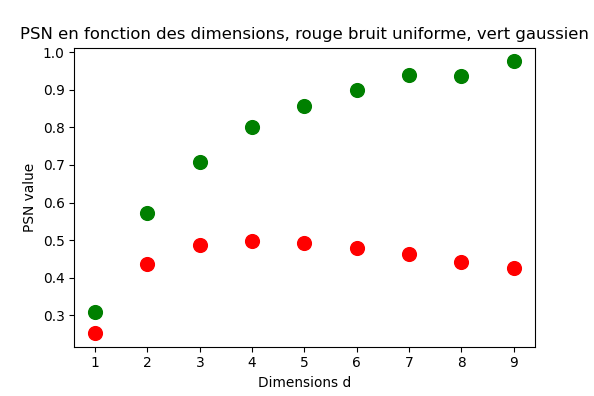

Text(0.5, 1.0, 'PSN en fonction des dimensions, rouge bruit uniforme, vert gaussien')

In [14]:
fig, ax = plt.subplots()
for i in range(1, 10):
    ax.plot(i, results_dim_unif[i-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    ax.plot(i, results_dim_gauss[i-1], marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")

ax.set_xlabel("Dimensions d")
ax.set_ylabel("PSN value")
ax.set_title("PSN en fonction des dimensions, rouge bruit uniforme, vert gaussien")

In [21]:
def diff_p_true_p_single_noise_cone_gaussien_opti(c, theta, epsilon, rayon, iterations, dim, mu, sigma):
    count_in_sphere = 0
    count_in_cone = 0
    points_sphere = []
    points_cone = []
    points_not_in_cone = []
    points_in_cone = []
    count_not_in_cone = 0

    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
    
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            points_cone.append(point)
    if count_in_sphere != 0:
        
        vol_in_cone = vol_boule * (count_in_cone/count_in_sphere)
    
        #fig = plt.figure(figsize=(6, 6))
        #ax = fig.add_subplot(111, projection='3d')
        #for i in points_cone:
            #ax.scatter(i[0], i[1], i[2], color = 'orange')
        vol_out_cone = vol_boule - vol_in_cone
    
        #probabilité que les points de la boule ne soient pas dans le cone:
        p1 = 1 - count_in_cone/count_in_sphere
        
        PSN = NormalDist(mu = mu, sigma = sigma).cdf(NormalDist(mu=mu, sigma=sigma).inv_cdf(p1) - epsilon/sigma)
    
        for i in points_sphere:
            i[0] = i[0] + epsilon
    
        #on teste si on est en dehors ou non du cone:
        for point in points_sphere:
            x1 = point[0]
            z = x1
            S = 0
            for i in range(len(point)-1):
                S += point[i + 1]**2
            rho = np.sqrt(S)
            if (z > c) and (rho <= z*np.tan(theta)):
                points_in_cone.append(point)
            else:
                count_not_in_cone += 1
                points_not_in_cone.append(point)
                
        vol_deplace = vol_boule*(count_not_in_cone/count_in_sphere)
        
        p_true = vol_deplace/vol_boule
        
    
    return(p_true - PSN, p_true, PSN)

In [22]:
diff_p_true_p_single_noise_cone_gaussien_opti(0, np.pi/4, 0.5, 1, 100000, 3, 0, 1)

(-0.10220950173328192, 0.6034384063501755, 0.7056479080834575)

In [25]:
P_true_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 100000, 3)

0.5988526037069727

# Maintenant avec bruit Gaussien (CORRECTION)

Du coup le pattern serait :

1. simuler des points selon N(0,sigma^2I), calculer la proportion hors du cône, cela donne p1

2. calculer p_singleNoise à partir de p_1 et de epsilon

3. Simuler des points selon N(epsilon, sigma_2I) (ou juste décaler les points simulés selon la première loi de epsilon) et voir quelle proportion est hors du cône, cela donne le vrai certificat.

<IPython.core.display.Javascript object>


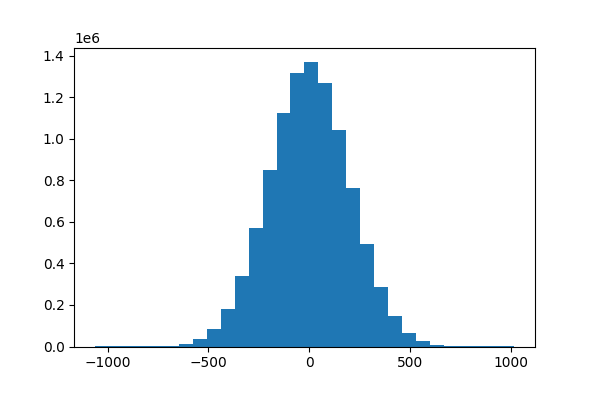

In [15]:
#Simulation de points selon une loi normale
point = np.random.normal(0, 200, 10000000)
count, bins, ignored = plt.hist(point, 30)
plt.show()

<IPython.core.display.Javascript object>


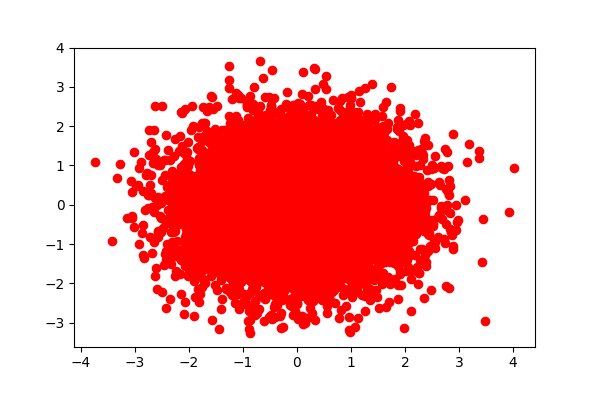

In [18]:
fig, ax = plt.subplots()
list_points = []
for i in range(10000):
    list_points.append(np.random.normal(0, 1, 2))
for i in list_points:
    ax.scatter(i[0], i[1], color = "red")


In [9]:
def diff_p_true_psn_cone_gauss_n_dim(epsilon, sigma, c, theta, iterations, dim):
    list_points = []
    points_in_cone = []
    true_points_in_cone = []
    count_in_cone = 0
    true_in_cone = 0
    for counts_it in range(iterations):
        point = np.random.normal(0, sigma, dim)
        list_points.append(point[:])
        z = point[0]
        S = 0
        for i in range(1, dim):
            S += point[i]**2
        rho = np.sqrt(S)
        if z > 0 and rho <= z*np.tan(theta):
            count_in_cone += 1
            points_in_cone.append(point[:])
        nppoint = np.array(point)
        nppoint[0] = nppoint[0] + epsilon
        z = nppoint[0]
        if z > 0 and rho <= z*np.tan(theta):
            true_in_cone += 1
            true_points_in_cone.append(nppoint[:])
    p1 = 1 - count_in_cone/iterations
    PSN = stats.norm.cdf(stats.norm.ppf(p1) - epsilon/sigma)
    
    p_true = 1 - true_in_cone/iterations
    return p_true - PSN, p_true, PSN



In [37]:
diff_p_true_psn_cone_gauss_n_dim(0.5, 1, 0, np.pi/4, 10000, 2)

<ipython-input-19-83cb99d1a6be>:14: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(S)


(0.5002099229986599, 0.5003, 9.007700134017194e-05)

In [70]:
def graph_cone_gauss_n_dim_eps_var(eps_min, eps_max, nbre_eps, sigma, iterations, c , theta, dimensions):
    epsilons = np.linspace(eps_min, eps_max, nbre_eps)
    fig, ax = plt.subplots()
    liste_results = []
    for dim in dimensions:
        liste = []
        for eps in epsilons:
            liste.append(diff_p_true_psn_cone_gauss_n_dim(eps, sigma, c, theta, iterations, dim)[0])
        liste_results.append(liste[:])
        ax.plot(epsilons, liste[:], label = 'Dimension ' + str(dim))
        ax.legend()
    ax.set_ylabel('Ptrue - PSN')
    ax.set_xlabel('Epsilon')
    ax.set_title('Ptrue-PSN a epsilons variables, sur différentes dimensions, theta = ' + str(theta) + ' et sigma = ' + str(sigma))
    return liste_results

<IPython.core.display.Javascript object>


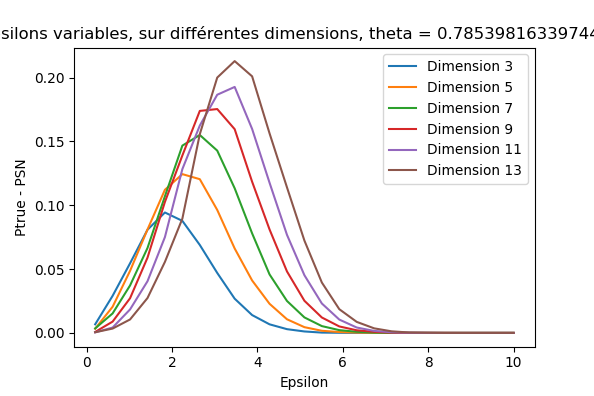

[[0.0067268304643306465,
  0.029045778228477648,
  0.054492241517306916,
  0.08080144819182777,
  0.09431314238292593,
  0.08775392116913999,
  0.06889310941373752,
  0.046972437383104866,
  0.02680685265586411,
  0.013974645249577863,
  0.006723425285160861,
  0.0029352701789976824,
  0.0011344866287186757,
  0.0002458851604306255,
  9.943027822482746e-05,
  -6.673983605012555e-08,
  9.993250785469266e-06,
  -5.443291624018329e-10,
  -3.9985152924087066e-11,
  -2.499707845313793e-12,
  -1.2938712358038108e-13,
  -5.809039714085737e-15,
  -2.0305780638944777e-16,
  -6.707614038065268e-18,
  -1.8199238152338926e-19],
 [0.0032886932005014025,
  0.020476836442035906,
  0.048577614191517626,
  0.08098038579122957,
  0.11210820829205764,
  0.12436301542334138,
  0.12040516627412401,
  0.09629823370038802,
  0.06612886283412292,
  0.04108060579352677,
  0.022807979214114746,
  0.010679071874545995,
  0.004497993660258495,
  0.0016591546418597562,
  0.0006832835727002333,
  0.0002490019382132

In [71]:
graph_cone_gauss_n_dim_eps_var(0.2, 10, 25, 1, 100000, 0, np.pi/4, [3, 5, 7, 9, 11, 13])

In [8]:
def graph_cone_gauss_n_dim_thet_var(th_min, th_max, nbre_th, sigma, iterations, c , epsilon, dimensions):
    thetas = np.linspace(th_min, th_max, nbre_th)
    fig, ax = plt.subplots()
    liste_results = []
    for dim in dimensions:
        liste = []
        for th in thetas:
            liste.append(diff_p_true_psn_cone_gauss_n_dim(epsilon, sigma, c, th, iterations, dim)[0])
        liste_results.append(liste[:])
        ax.plot(thetas, liste[:], label = 'Dimension ' + str(dim))
        ax.legend()
    ax.set_ylabel('TC - SNC')
    ax.set_xlabel('Théta')
    ax.set_title('Sous-estimation SNC, epsilon = ' + str(epsilon) + ' et sigma = ' + str(sigma) + '.')
    return liste_results

<IPython.core.display.Javascript object>


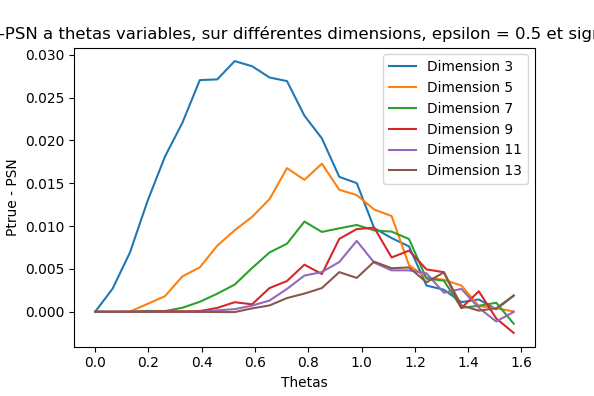

[[0.0,
  0.0026969046069488245,
  0.006947588600429988,
  0.012914174993551075,
  0.018102039905298795,
  0.022050980171547274,
  0.027037652323908423,
  0.027118681506328346,
  0.02925374271311887,
  0.028656224062662106,
  0.02734010714583235,
  0.02692070958491799,
  0.0228812901629466,
  0.020238144338184494,
  0.01574360041183842,
  0.015012701735514833,
  0.009759018496914629,
  0.00860152608107656,
  0.007629315983404994,
  0.0030608095969745786,
  0.0025711583230287882,
  0.001124308521508799,
  0.0014375451063805,
  0.0002822623547896752,
  0.001879165248012793],
 [0.0,
  -9.99999999995449e-06,
  2.4592886927576885e-05,
  0.0009178521209911583,
  0.0018176068534595524,
  0.0041281041285109454,
  0.005176818612386835,
  0.0077065866857123355,
  0.009505772220661401,
  0.011079414508842866,
  0.01315419755691527,
  0.01676132072762926,
  0.015394880436391478,
  0.01728630310432555,
  0.014233917214449221,
  0.013621140621807082,
  0.01193721116995805,
  0.011169847116001663,
  0

In [7]:
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 1, 100000, 0 , 0.5, [3, 5, 7, 9, 11, 13])

In [79]:
def graph_cone_gauss_n_dim_sigma_var(sigma_min, sigma_max, nbre_sigma, theta, iterations, c , epsilon, dimensions):
    sigmas = np.linspace(sigma_min, sigma_max, nbre_sigma)
    fig, ax = plt.subplots()
    liste_results = []
    for dim in dimensions:
        liste = []
        for sig in sigmas:
            liste.append(diff_p_true_psn_cone_gauss_n_dim(epsilon, sig, c, theta, iterations, dim)[0])
        liste_results.append(liste[:])
        ax.plot(sigmas, liste[:], label = 'Dimension ' + str(dim))
        ax.legend()
    ax.set_ylabel('Ptrue - PSN')
    ax.set_xlabel('Sigmas')
    ax.set_title('Ptrue-PSN a sigmas variables, sur différentes dimensions, theta = ' + str(theta) + ' et epsilon = ' + str(epsilon))
    return liste_results

<IPython.core.display.Javascript object>


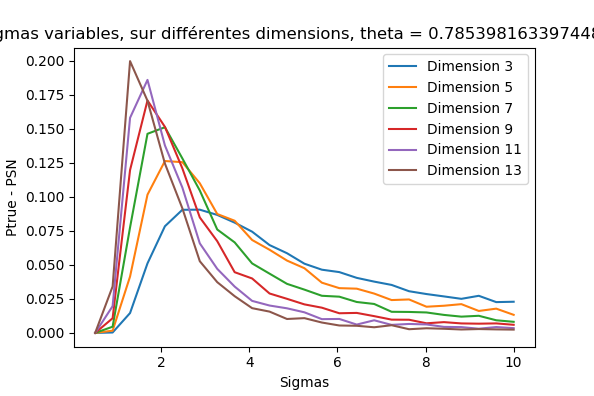

[[-1.7385964117264408e-19,
  0.00029712105136823894,
  0.014589665606143514,
  0.05110084724372002,
  0.07839123611682941,
  0.09048382059853055,
  0.09055992186883072,
  0.08671036277084576,
  0.08103993405269094,
  0.07439712933536713,
  0.06455398861176531,
  0.05856396635260863,
  0.050865546569155096,
  0.04645951742921739,
  0.044691411607373555,
  0.04045361629269739,
  0.03769827964783423,
  0.035261044764262506,
  0.03063469231951399,
  0.028558714509746008,
  0.02682524338004555,
  0.025044048706894584,
  0.027272961690228636,
  0.022636305545736812,
  0.022906411369326474],
 [-1.6695394280024733e-17,
  0.0016401928688171434,
  0.04141081135151059,
  0.10158639733370645,
  0.12630763244753218,
  0.1254856870445875,
  0.10997268127530424,
  0.08737327409356532,
  0.08242562611541437,
  0.06829307735510814,
  0.061096981687277285,
  0.05316598429685748,
  0.04753737868978558,
  0.03691734478362152,
  0.03289838114442334,
  0.03251185721849914,
  0.028907358067267408,
  0.024137

In [81]:
graph_cone_gauss_n_dim_sigma_var(0.5, 10, 25, np.pi/4, 100000, 0 , 5, [3, 5, 7, 9, 11, 13])

# A bruit uniforme avec autre méthodes que celle du rejet

http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/

Methode 20

<IPython.core.display.Javascript object>


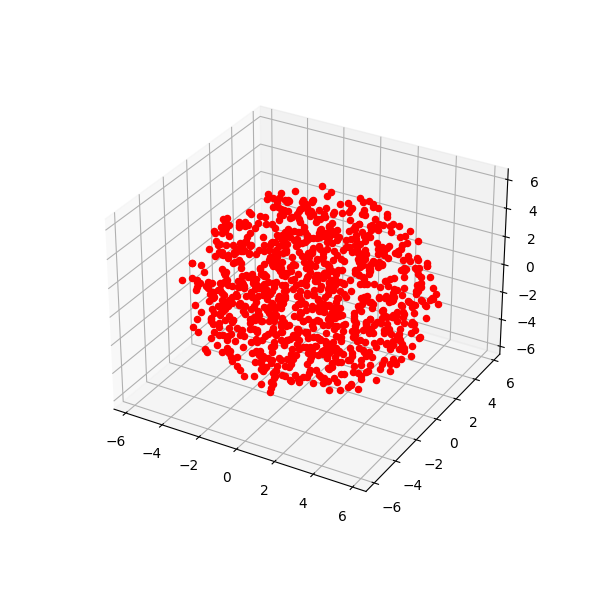

In [56]:
d = 3
list_points = []
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(1000):
    u = np.random.normal(0,1,d)  # an array of d normally distributed random variables
    norm= np.sum(u**2) **(0.5)
    r = np.random.random()**(1.0/d)
    x= r*u/norm
    x = x*6
    list_points.append(x)
for i in range(len(list_points)):
    ax.scatter(list_points[i][0], list_points[i][1], list_points[i][2], color = 'red')
plt.show()

In [4]:
def nSphereVolume(dim, iterations):
    count_in_sphere = 0

    for count_loops in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim)
        distance = np.linalg.norm(point)
        if distance < 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / iterations)

In [5]:
for i in range(1, 15):
    print(nSphereVolume(i, 100000))

2.0
3.14604
4.1876
4.95056
5.29984
5.24288
4.71808
3.98336
3.08224
2.34496
1.80224
1.26976
0.57344
0.49152


In [4]:
def nsphere_volume_m_20(dim):
    return(((np.pi)**(dim/2))/(gamma(dim/2 + 1)))

In [18]:
for i in range(1, 15):
    print(nsphere_volume_m_20(i))

2.0
3.141592653589793
4.188790204786391
4.934802200544679
5.263789013914324
5.167712780049969
4.724765970331401
4.058712126416768
3.2985089027387064
2.550164039877345
1.8841038793898999
1.3352627688545893
0.9106287547832829
0.5992645293207919


In [4]:
def nsphere_volume_m_20(r, dim):
    return(((np.pi)**(dim/2))*(r**dim)/(gamma(dim/2 + 1)))

def diff_p_true_p_single_noise_cone_uniforme_opti_n_dim_m_20(rayon, epsilon, c, theta, iterations, dim):
    list_points = []
    count_in_cone = 0
    points_in_cone = []
    count_in_cone_ptrue = 0
    count_not_in_cone_ptrue = 0
    points_in_cone_ptrue = []
    
    for i in range(iterations):
        u = np.random.normal(0,1,dim)  # an array of d normally distributed random variables
        norm= np.sum(u**2) **(0.5)
        r = np.random.random()**(1.0/dim)
        point = r*u/norm
        point = point*rayon
        list_points.append(point)
        z = point[0]
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone +=1
            points_in_cone.append(point)
        
        point[0] = point[0] + epsilon
        z = point[0]
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone_ptrue +=1
            points_in_cone_ptrue.append(point)
        else:
            count_not_in_cone_ptrue += 1
            
    vol_boule = nsphere_volume_m_20(rayon, dim)
    
    p1 = 1 - count_in_cone/iterations
    
    a = (dim + 1)/2
    b = 1/2
    x = 1 - (epsilon/(2*rayon))**2
    Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
    Psn = p1 - 1 + 2*(Vcap/vol_boule)
    

        
           
            
    vol_deplace = vol_boule*(count_not_in_cone_ptrue/iterations)
    
    p_true = vol_deplace/vol_boule
    
    return(p_true - Psn, p_true, Psn)

In [25]:
diff_p_true_p_single_noise_cone_uniforme_opti_n_dim_m_20(1, 0.5, 0, np.pi/3, 100000, 7)

(0.109777977294922, 0.49455999999999994, 0.38478202270507794)

In [6]:
def graph_n_dim_theta_var_mult_dim_m_20(n_theta, rayon, epsilon, c, iterations, dim_list):
    thetas = np.linspace(0, np.pi/2, n_theta, endpoint = False)
    fig, ax = plt.subplots()
    for dim in dim_list:
        liste = []
        for i in range(len(thetas)):
            liste.append(diff_p_true_p_single_noise_cone_uniforme_opti_n_dim_m_20(rayon, epsilon, c, thetas[i], iterations, dim)[0])
        ax.plot(thetas, liste[:], label = 'dim: ' + str(dim))
        ax.legend()
    ax.set_xlabel("Théta")
    ax.set_ylabel('TC - SNC')
    ax.set_title('Sous-estimation du SNC, epsilon = ' +str(epsilon) +' rayon = ' + str(rayon) + '.')

<IPython.core.display.Javascript object>


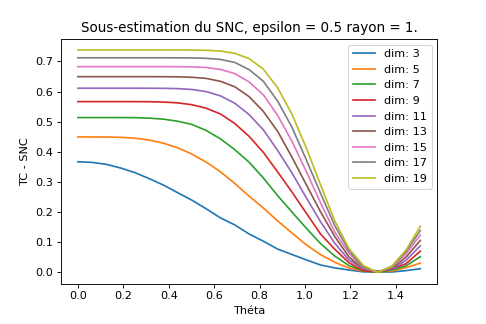

In [7]:
graph_n_dim_theta_var_mult_dim_m_20(25, 1, 0.5, 0, 100000, [3, 5, 7, 9, 11, 13, 15, 17, 19])

<IPython.core.display.Javascript object>


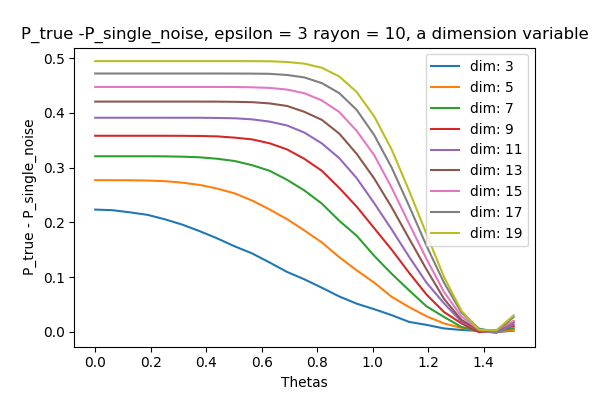

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie13
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie17
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Dimension finie19


In [18]:
graph_n_dim_theta_var_mult_dim_m_20(25, 10, 3, 0, 100000, [3, 5, 7, 9, 11, 13, 15, 17, 19])

# lancements d'essais avec theta variables de bon sigma et epsilon

<IPython.core.display.Javascript object>


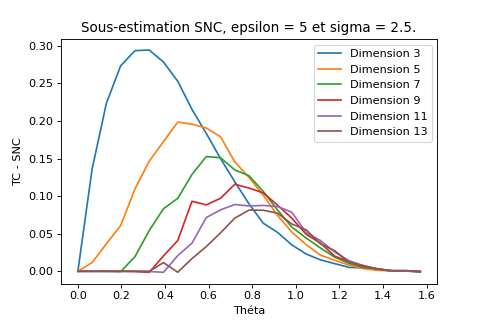

[[0.0,
  0.1362249341621291,
  0.22358555394711588,
  0.2733895457240493,
  0.2934918721501014,
  0.2943895963480093,
  0.27840216428335374,
  0.2528141958443607,
  0.21528434310927347,
  0.18343577199498373,
  0.14993255869385497,
  0.11903013303673843,
  0.08954184647202379,
  0.06382518298112144,
  0.0517138266002799,
  0.03501283794232568,
  0.022995571881557875,
  0.01519770808052584,
  0.010187606365802238,
  0.0052322425795313585,
  0.0043818842902866445,
  0.002679589294862672,
  0.00019988202049563142,
  0.00047301549198110887,
  -0.00048299371111994865],
 [0.0,
  0.011649690927209466,
  0.03662795791161966,
  0.06083204355982463,
  0.10953282691933575,
  0.1463389114289071,
  0.17253112171468965,
  0.19850251180235023,
  0.19564078022325337,
  0.19058672061292592,
  0.17891957200247394,
  0.14555470635348555,
  0.12466899284412458,
  0.10114883725445412,
  0.07417246304100844,
  0.05217609372192744,
  0.03550500188112665,
  0.02154488913932512,
  0.014661604615675616,
  0.008

In [10]:
#sigma = 2.5 , epsilon = 5
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 2.5, 100000, 0 , 5, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


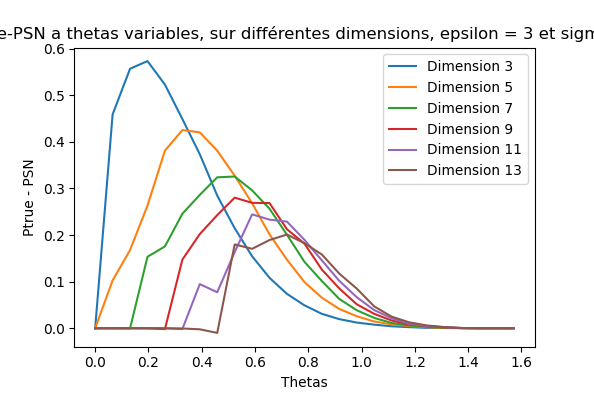

[[0.0,
  0.4586956949196349,
  0.5568209981448505,
  0.5731221321172628,
  0.5227517772650232,
  0.4489177386731918,
  0.3732598348620328,
  0.2845397488667282,
  0.21460223430168598,
  0.15441803035373003,
  0.10807645105538033,
  0.07372832659495634,
  0.04919941934381944,
  0.03085875274575625,
  0.019530520280174372,
  0.012199586583749825,
  0.007706892727970142,
  0.004207927481509137,
  0.0023111395120324002,
  0.0009081431827336443,
  0.0007283893615386075,
  0.0001803717897417359,
  1.81805210866799e-05,
  -0.0001465911475433089,
  0.0001254246746548596],
 [0.0,
  0.1026352389639803,
  0.1677326192475035,
  0.26323758828650934,
  0.38097504345758193,
  0.4251516603789399,
  0.42026300831664753,
  0.3808089948618987,
  0.3272391568443961,
  0.2682493058500484,
  0.2011726408400082,
  0.14699371599317412,
  0.09902767813896891,
  0.06553318547059511,
  0.0414506740931749,
  0.02575076329169681,
  0.01454767132980389,
  0.008434342783255753,
  0.004725896378139522,
  0.0023743300

In [10]:
#sigma = 1 , epsilon = 3
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 1, 100000, 0 , 3, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


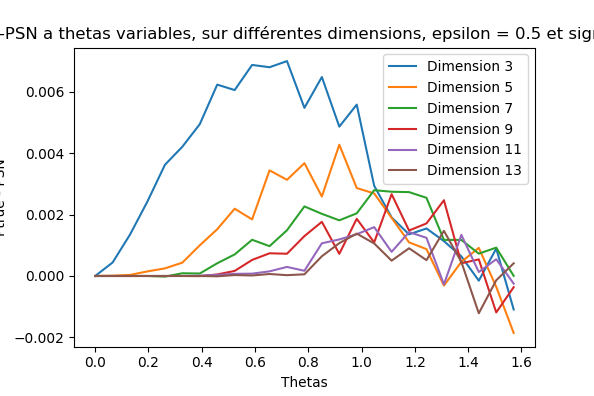

[[0.0,
  0.00043971840870871137,
  0.001351387079522648,
  0.0024303286843393446,
  0.003622967400258137,
  0.004212445974243084,
  0.004946838824823163,
  0.006234769020952324,
  0.006057292498344524,
  0.006876327780620861,
  0.006801290321746034,
  0.007000806615924615,
  0.005477866322889713,
  0.006482194293296439,
  0.004866011440965989,
  0.005582748120533054,
  0.002940424610751169,
  0.0019088749520698167,
  0.0013563385257756577,
  0.001548152124272617,
  0.0011362243637683678,
  0.0006379010331551971,
  -0.00015256369410548976,
  0.0008930361670538289,
  -0.0010901846495246503],
 [0.0,
  1.0816602664553976e-05,
  3.5526221450532525e-05,
  0.00014970997233931804,
  0.0002483613721443456,
  0.00043495769782397886,
  0.0009995869524953571,
  0.0015229691258421552,
  0.002192253849815473,
  0.0018428908015323264,
  0.003440828226550563,
  0.003133672570335033,
  0.003676239208667109,
  0.0025901786817641437,
  0.0042776638986454785,
  0.002865349272143325,
  0.002690208983867959

In [11]:
#sigma = 3, epsilon = 0.5
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 3, 100000, 0 , 0.5, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


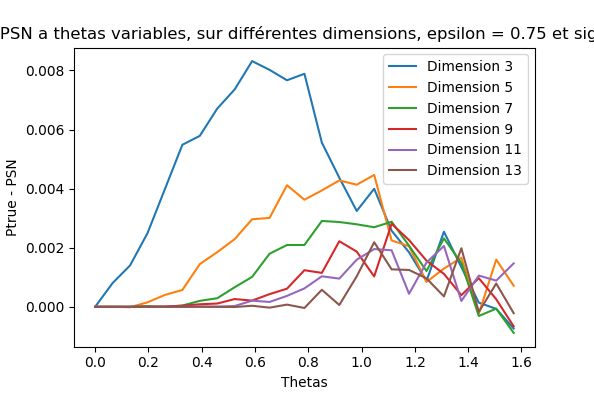

[[0.0,
  0.0008044757975529393,
  0.0013988919601731764,
  0.002490649786887289,
  0.003986016430029271,
  0.005482777033531283,
  0.00578590110972077,
  0.006708204399204942,
  0.007355832413161512,
  0.00831462381226522,
  0.008019041785307657,
  0.007666198527174539,
  0.007885548232842932,
  0.005556036651386598,
  0.004368860734437985,
  0.003243412370828369,
  0.003995118516911811,
  0.0025761478479334743,
  0.001842820385554167,
  0.0008730425773634254,
  0.0025410858637010536,
  0.001342121598354673,
  0.000140618790658964,
  -6.960825697049922e-05,
  -0.0007352551582917588],
 [0.0,
  0.0,
  -1.4696398776936626e-05,
  0.0001521975387204222,
  0.0004020695716693279,
  0.0005697373895240387,
  0.0014454838736663866,
  0.001850540621740393,
  0.0022902012550440887,
  0.0029621557537852228,
  0.003008233685418804,
  0.004114590117773376,
  0.0036236300895374773,
  0.003938900483986929,
  0.004276081591484959,
  0.004131896909096988,
  0.004462571617182665,
  0.002246448991754746,
 

In [12]:
#sigma = 4, epsilon = 0.75
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 4, 100000, 0 , 0.75, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


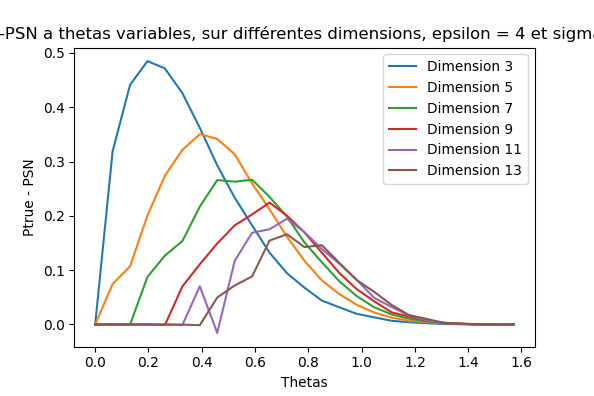

In [14]:
#sigma = 1.5, epsilon = 4
res1 = graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 1.5, 100000, 0 , 4, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


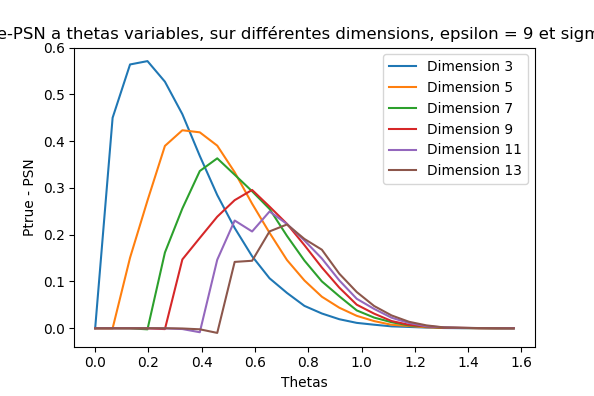

In [15]:
#sigma = 3, epsilon = 9
res2 = graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 3, 100000, 0 , 9, [3, 5, 7, 9, 11, 13])

<IPython.core.display.Javascript object>


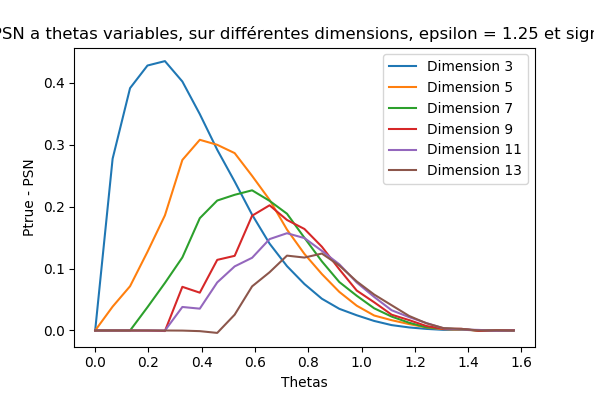

[[0.0,
  0.27745403179173445,
  0.39147210925231235,
  0.42800964775540445,
  0.4351317635388088,
  0.4021830542466629,
  0.34952179875006356,
  0.2918615370707197,
  0.24059872946617328,
  0.1870242238533421,
  0.14037901376352002,
  0.10394902414473006,
  0.07506334895194382,
  0.05130913973637708,
  0.03503388819809504,
  0.024597031708370153,
  0.01541352878661495,
  0.008701567861023302,
  0.004957346710940832,
  0.002565821719254815,
  0.0010145647922353822,
  0.0010567004810972652,
  0.00042342694280557945,
  0.0004489381235905634,
  -1.9932769002146966e-05],
 [0.0,
  0.038551060606266896,
  0.07148323353712738,
  0.12714038980690345,
  0.18598794550934594,
  0.27546037066294493,
  0.30802942449609816,
  0.29993399226230505,
  0.286505475913353,
  0.24972844019465595,
  0.2111007002950993,
  0.16301206348509262,
  0.12371083652378023,
  0.09119984919709334,
  0.06237712535459333,
  0.0400433675612043,
  0.024205959119251066,
  0.016646432979507936,
  0.010363112471173747,
  0.00

In [16]:
#sigma = 0.5, epsilon = 1.25
graph_cone_gauss_n_dim_thet_var(0, np.pi/2, 25, 0.5, 100000, 0 , 1.25, [3, 5, 7, 9, 11, 13])